# Hopfield Network Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from alnum_dataset import generate_alnum_dataset
from hopfield import *

In [2]:
TRAIN_METHOD = 'centered'  # Options: 'basic', 'centered', 'damped'
LAM = 0.1                  # Damping factor for damped pseudoinverse training 

In [3]:
# Load dataset
X, y = generate_alnum_dataset()

print(f"Dataset shape: {X.shape}")
print(f"Data unique values: {np.unique(X)}")
print(f"Labels: {y}")

Dataset shape: (36, 28, 28)
Data unique values: [-1  1]
Labels: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


## Select patterns to store

In [4]:
# Select patterns to store
Patterns = list('PYTHON')                                   # Characters to store
X_mem = X[np.isin(y, Patterns)].reshape(len(Patterns), -1)  # Reshape to (num_patterns, num_features)
num_samples, num_features = X_mem.shape                     # get number of samples and features

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 6
Number of features: 784


## Train Hopfield network

In [5]:
# Initialize Hopfield Network
hopfield_net = HopfieldNetwork(n_neurons=num_features)

# Train Hopfield Network
if TRAIN_METHOD == 'basic':
    hopfield_net.train(X_mem)
elif TRAIN_METHOD == 'centered':
    hopfield_net.train_pseudoinverse_centered(X_mem)
elif TRAIN_METHOD == 'damped':
    hopfield_net.train_pseudoinverse_damped(X_mem, lam=LAM)
else:
    hopfield_net.train(X_mem)

# Check stability of stored patterns
margins = hopfield_net.get_margins(X_mem)
for patt, margin in zip(Patterns, margins):
    stability = "Stable" if margin >= 0 else "Unstable"
    print(f"Pattern: {patt}, Margin: {margin:.6f}, {stability}")

Pattern: P, Margin: -0.000000, Stable
Pattern: Y, Margin: -0.000000, Stable
Pattern: T, Margin: -0.000000, Stable
Pattern: H, Margin: -0.000000, Stable
Pattern: O, Margin: -0.000000, Stable
Pattern: N, Margin: -0.000000, Stable


## Weights of the Hopfield networks

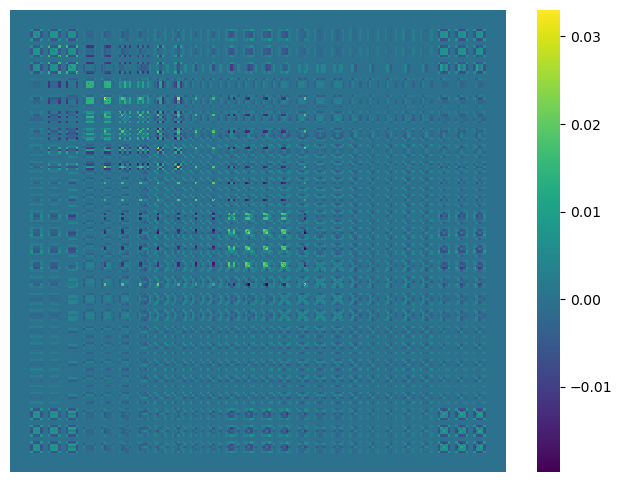

In [6]:
# Weights of the trained Hopfield Network
W = hopfield_net.get_weights()

# Plot the weight matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(W, cmap='viridis')

ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Test Hopfield Network

### Stored patterns

Converged after 0 iterations.


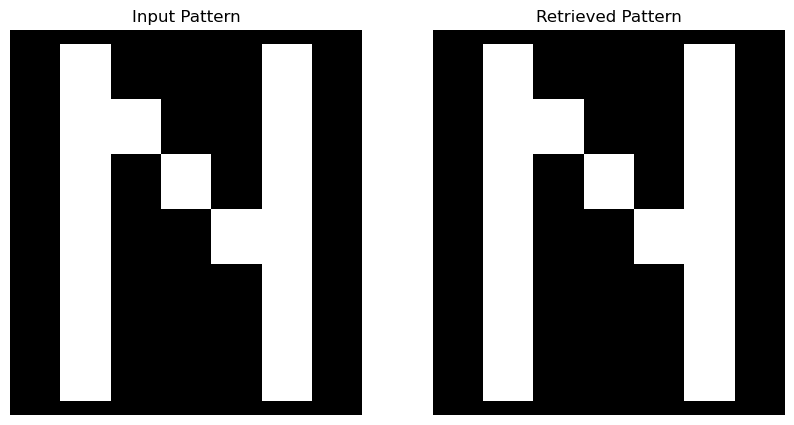

In [7]:
inp = X_mem[1].copy()
out = hopfield_net.retrieve(inp, max_iterations=1000)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(inp.reshape(28,28), cmap='gray', cbar=False, ax=axs[0]) 
sns.heatmap(out.reshape(28,28), cmap='gray', cbar=False, ax=axs[1])
axs[0].set_title("Input Pattern")
axs[1].set_title("Retrieved Pattern")

for i in range(2):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

### Noisy patterns

In [8]:
def add_noise(pattern, p=0.1):
    """
    Add noise to a binary pattern by flipping each bit with probability p.
    """
    noisy_pattern = pattern.copy()
    n_flip = int(p * pattern.size)
    flip_indices = np.random.choice(pattern.size, size=n_flip, replace=False)
    noisy_pattern[flip_indices] *= -1
    return noisy_pattern

Converged after 1 iterations.


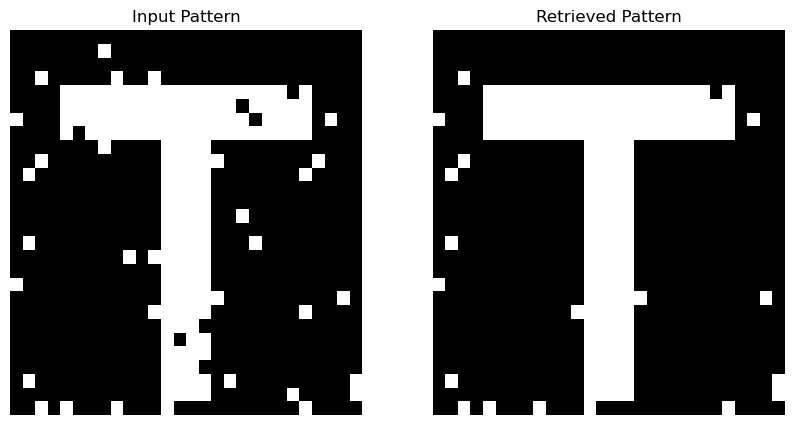

In [10]:
inp = add_noise(X_mem[4], p=0.05)
out = hopfield_net.retrieve(inp, max_iterations=1000)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(inp.reshape(28,28), cmap='gray', cbar=False, ax=axs[0]) 
sns.heatmap(out.reshape(28,28), cmap='gray', cbar=False, ax=axs[1])
axs[0].set_title("Input Pattern")
axs[1].set_title("Retrieved Pattern")

for i in range(2):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()